### Problem Statement
- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

**Hypothesis Generation**
- Item weight might effect a sales of the product.
- Sales of the product may be depends on the items fat content.
- More Item_Visibility of a particular product may be costlier than other products.
- Item type could have an effect on the sales.
- Are the items with more MRP have more item outlet sales.
- Are the stores which have established earlier have more sales.
- Size of the stores could have an effect on the item sales at a particular store.
- Location of the stores might depends on the Item outlet sales.
- Are the supermarkets have more sales than others.

- **LOADING NECESSARY PACKAGES**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,mean_absolute_percentage_error,confusion_matrix
     
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
## DATASETS

In [3]:
train=pd.read_csv("F:/Internship/Train.csv")
test=pd.read_csv("F:/Internship/Test.csv")

In [4]:
## Merging two datasets
df = pd.concat([train,test])
df.shape    

(14204, 12)

In [5]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [6]:
df.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

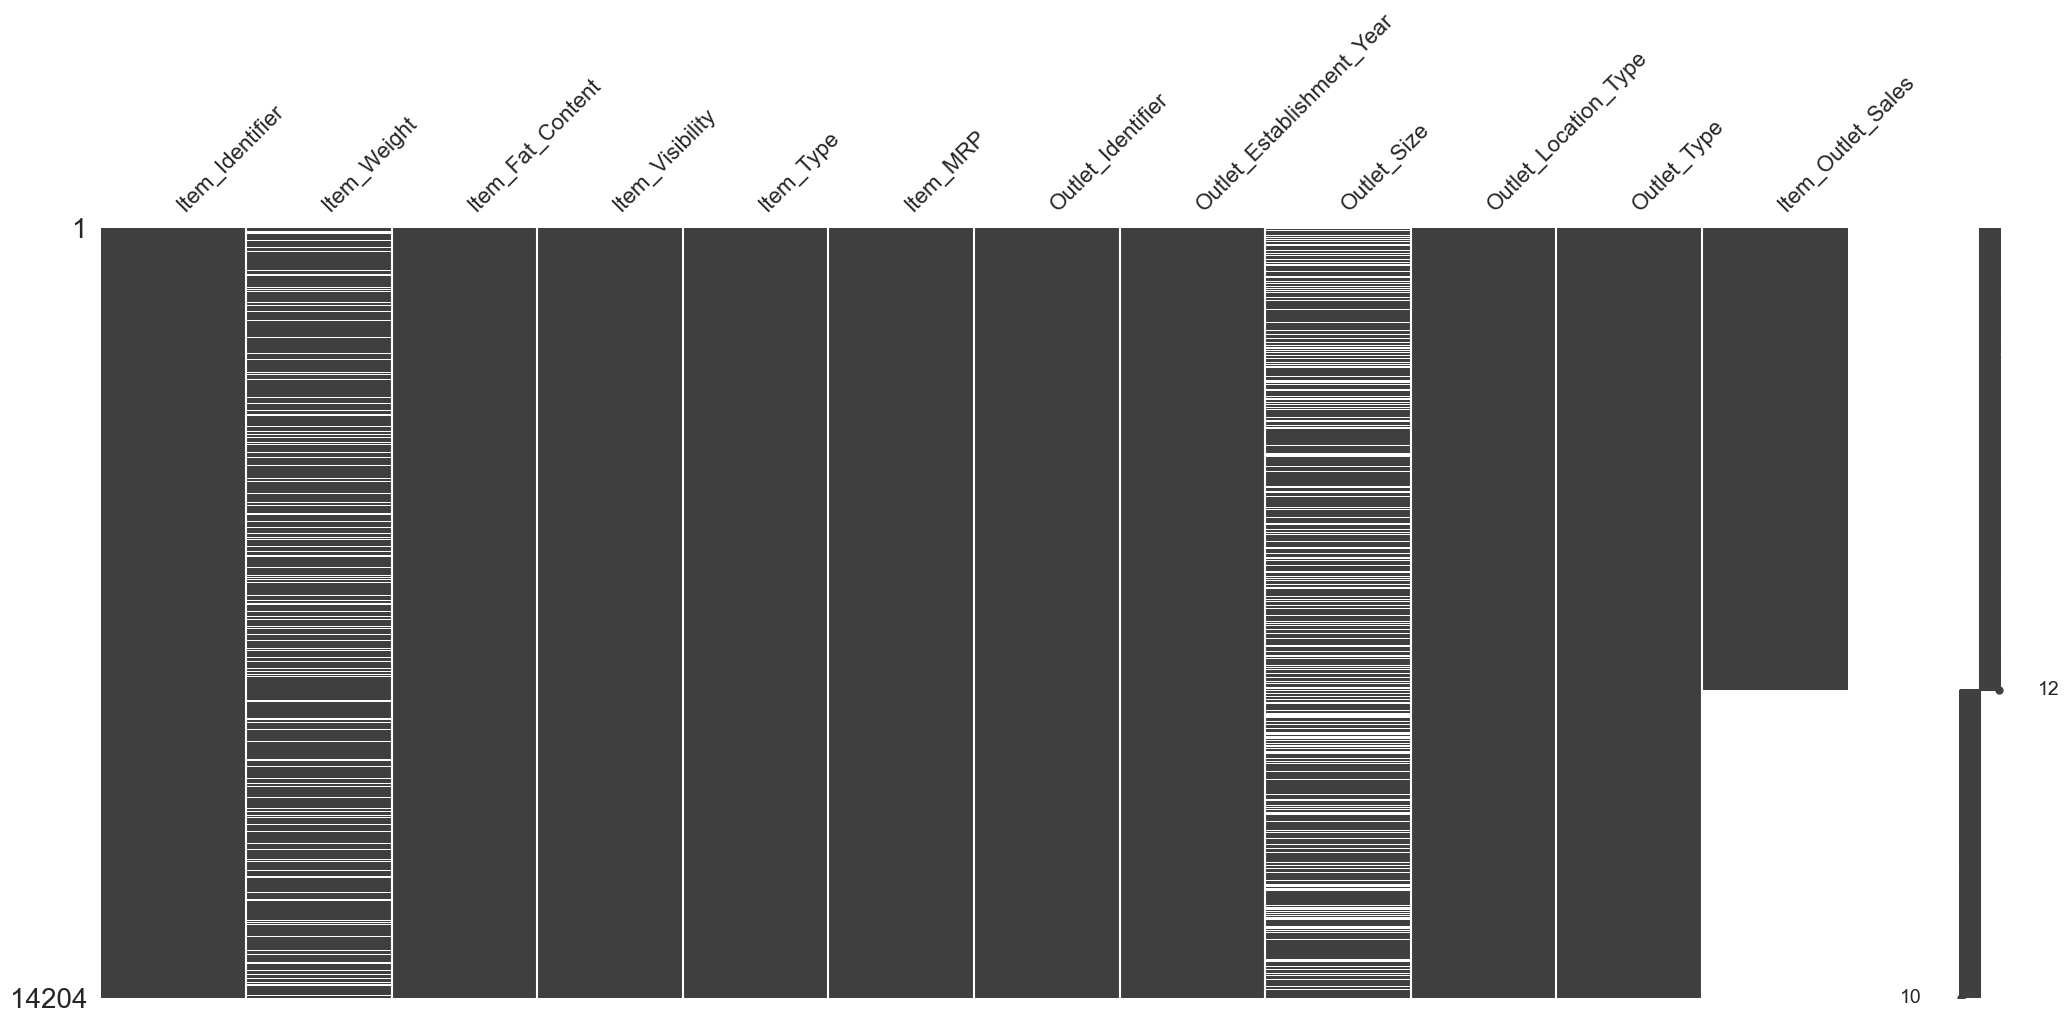

In [9]:
# Visualize missing values as a matrix
msno.matrix(df);

- The dataset 14204 contains datapoints (rows) and 12 features (columns).
- There are present categorical (object) and numerical features (float, int).
- The target is the _'Item_Outlet_Sales'_ feature.
- Some features presents null values and outliers.
- There are no duplicate rows.

In [10]:
## Checking value counts by column
cat_cols = df.select_dtypes(exclude='number').columns.to_list()
num_cols = df.select_dtypes(include='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [11]:
for col in cat_cols:
    print(f'\n Series| {col}')
    print(df[col].value_counts(normalize=True, dropna=False))


 Series| Item_Identifier
FDU15    0.000704
FDS25    0.000704
FDA38    0.000704
FDW03    0.000704
FDJ10    0.000704
           ...   
FDR51    0.000493
FDM52    0.000493
DRN11    0.000493
FDH58    0.000493
NCW54    0.000493
Name: Item_Identifier, Length: 1559, dtype: float64

 Series| Item_Fat_Content
Low Fat    0.597367
Regular    0.339623
LF         0.036750
reg        0.013729
low fat    0.012532
Name: Item_Fat_Content, dtype: float64

 Series| Item_Type
Fruits and Vegetables    0.141721
Snack Foods              0.140031
Household                0.108983
Frozen Foods             0.100394
Dairy                    0.079977
Baking Goods             0.076457
Canned                   0.076317
Health and Hygiene       0.060406
Meat                     0.051816
Soft Drinks              0.051112
Breads                   0.029288
Hard Drinks              0.025486
Others                   0.019713
Starchy Foods            0.018938
Breakfast                0.013095
Seafood                  0.0

In [12]:
## Checking for outliers using histogram and boxplot

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

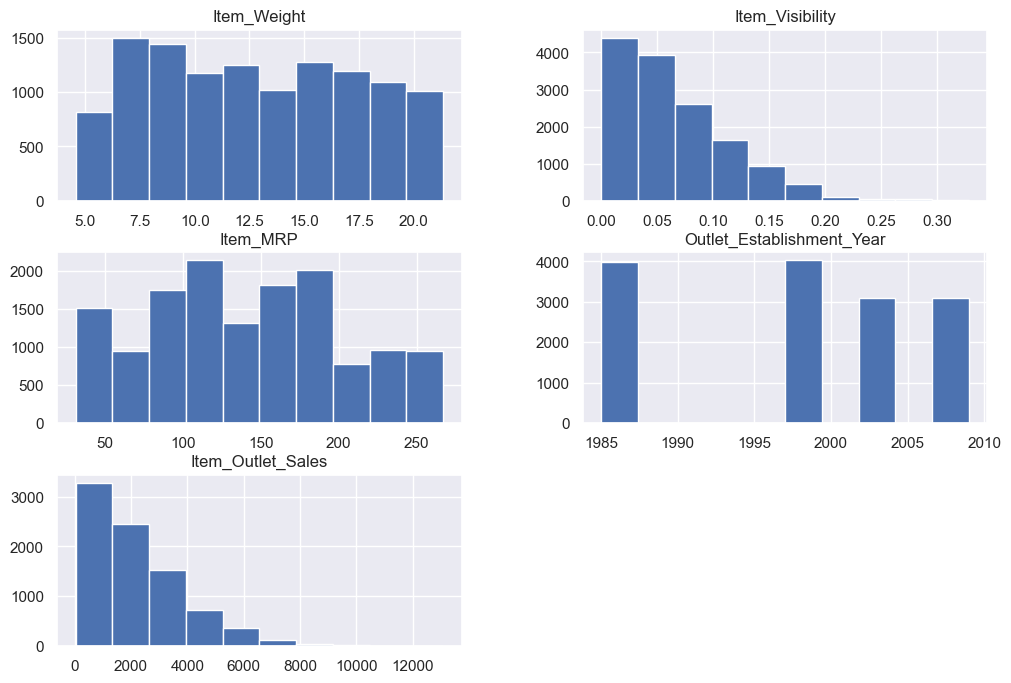

In [13]:
df.hist(figsize=(12,8))

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

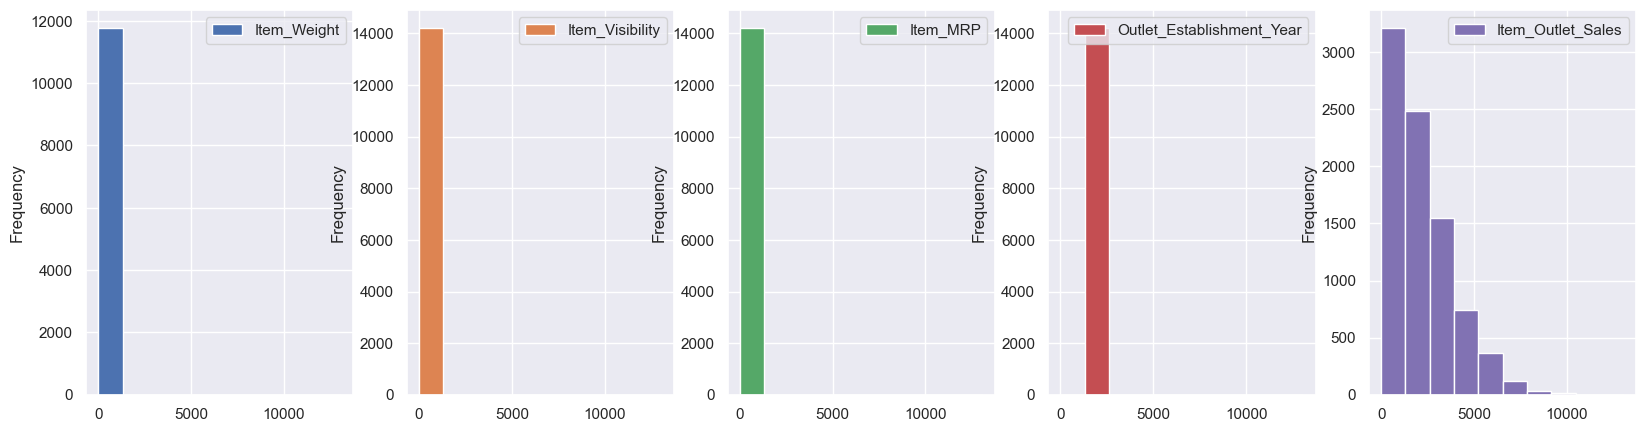

In [14]:
# data distribution of numerical values
df.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

Item_Weight                     AxesSubplot(0.125,0.11;0.133621x0.77)
Item_Visibility              AxesSubplot(0.285345,0.11;0.133621x0.77)
Item_MRP                      AxesSubplot(0.44569,0.11;0.133621x0.77)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.11;0.133621x0.77)
Item_Outlet_Sales            AxesSubplot(0.766379,0.11;0.133621x0.77)
dtype: object

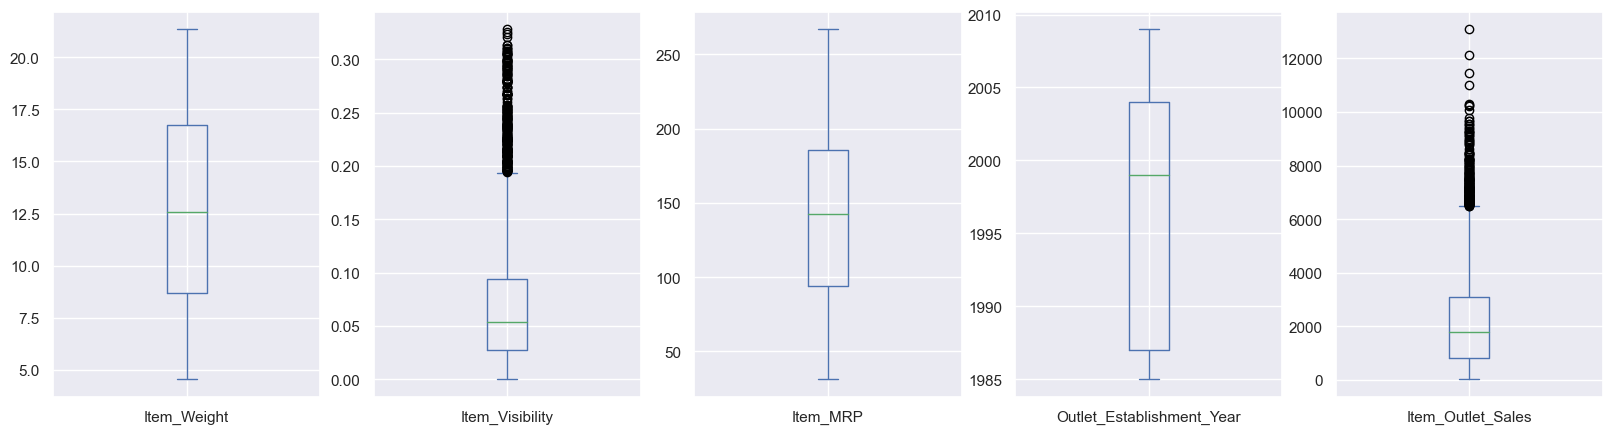

In [15]:
df.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

## EDA

### Univariate Analysis

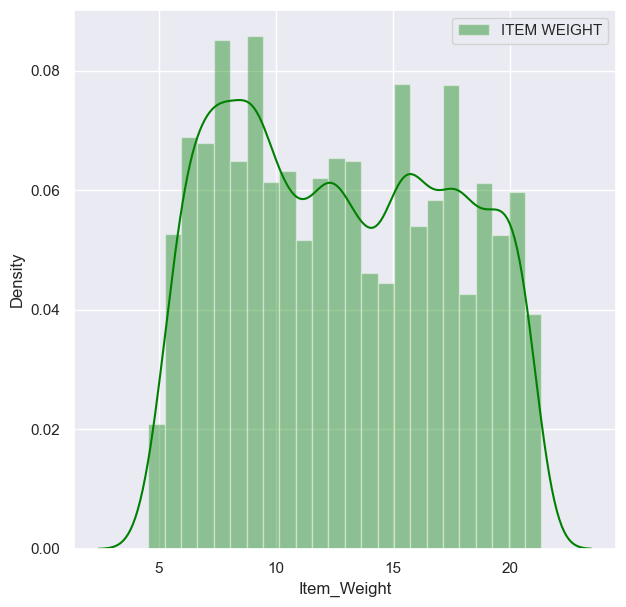

In [16]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.Item_Weight, color="green", label="ITEM WEIGHT", kde= True)
plt.legend()

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

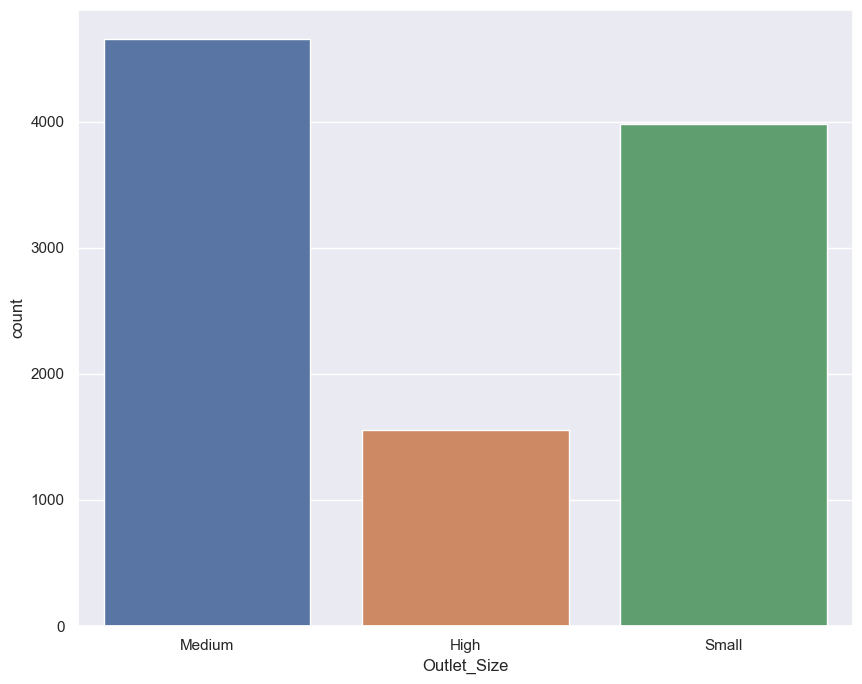

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Size)

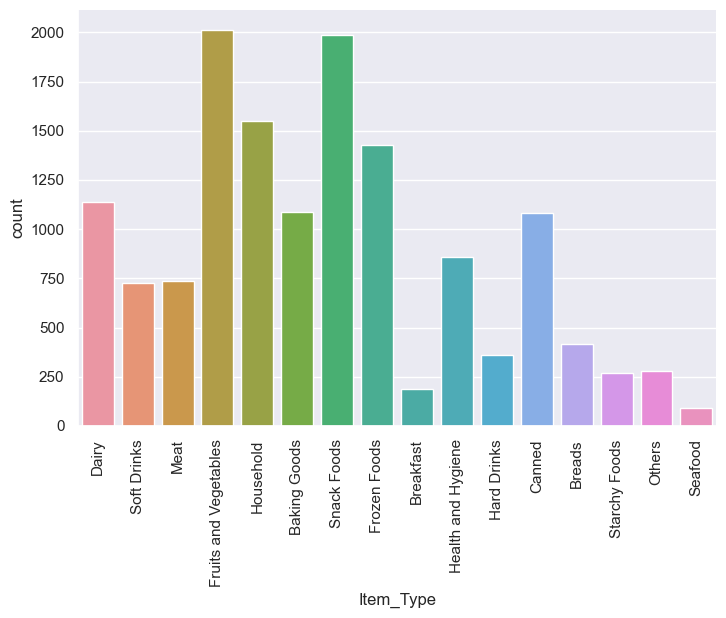

In [18]:
g = sns.factorplot("Item_Type", data=df, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

### Bivariate Analysis

In [19]:
fig = px.histogram(df, x="Item_Outlet_Sales", color="Outlet_Size", barmode="group", title="<b>Outlet Size Distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

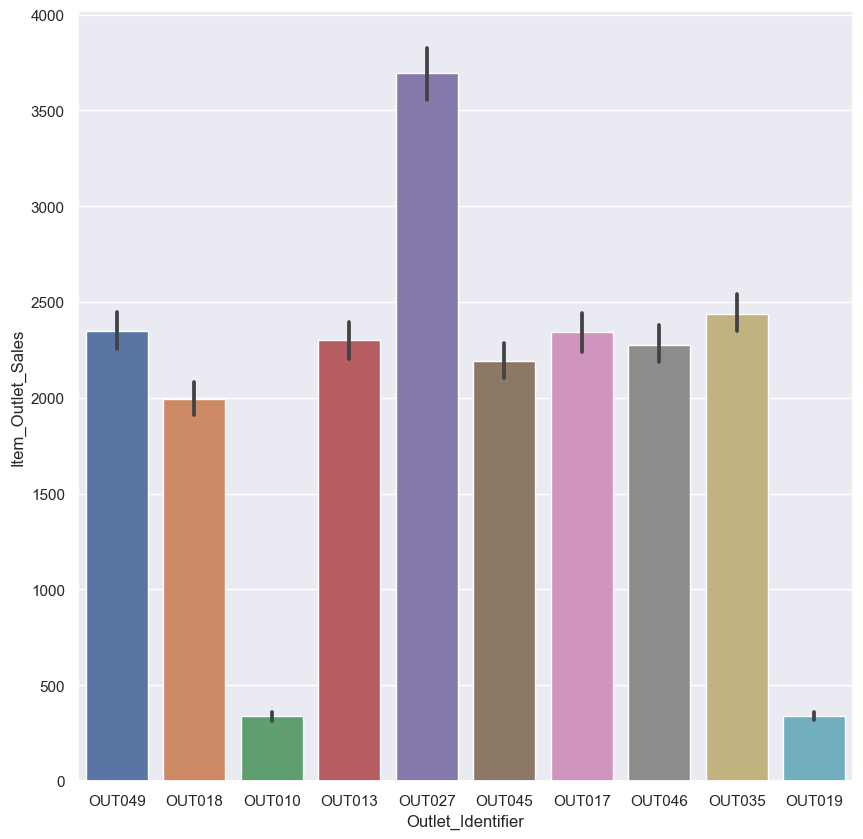

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(x=df['Outlet_Identifier'], y=df['Item_Outlet_Sales'])

<AxesSubplot:>

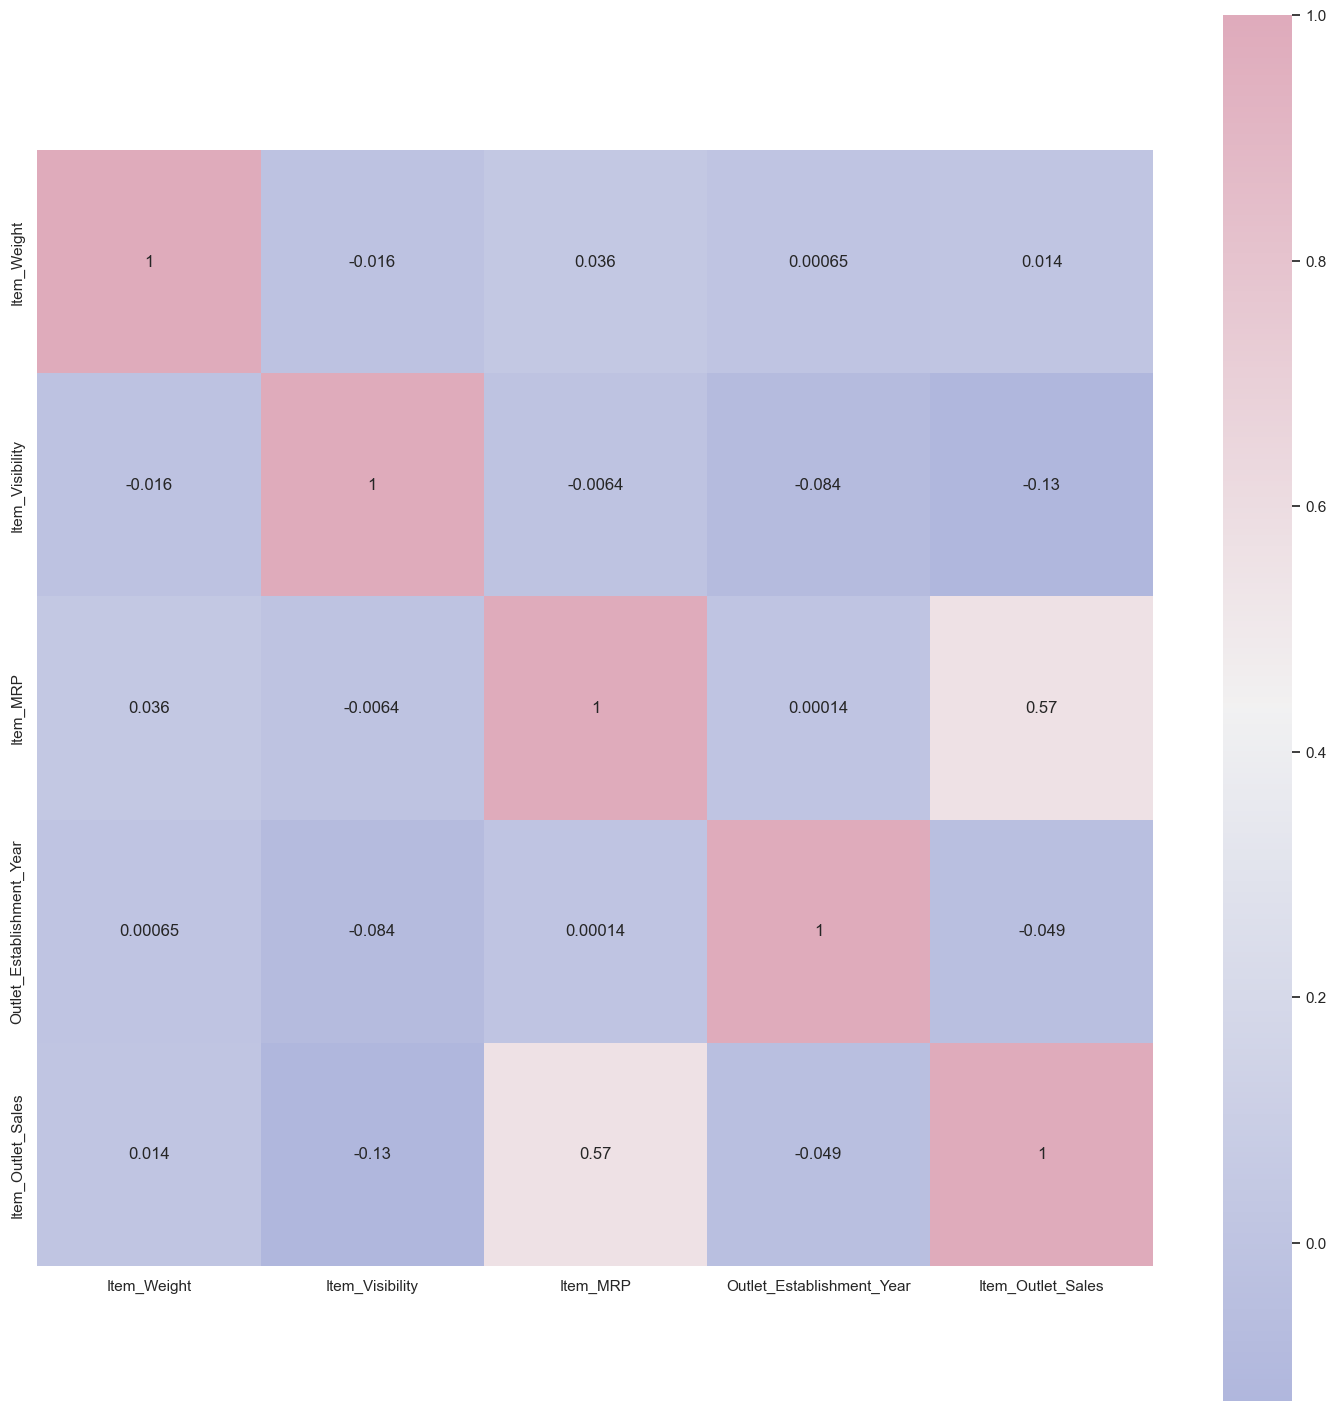

In [21]:
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

<AxesSubplot:title={'center':'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

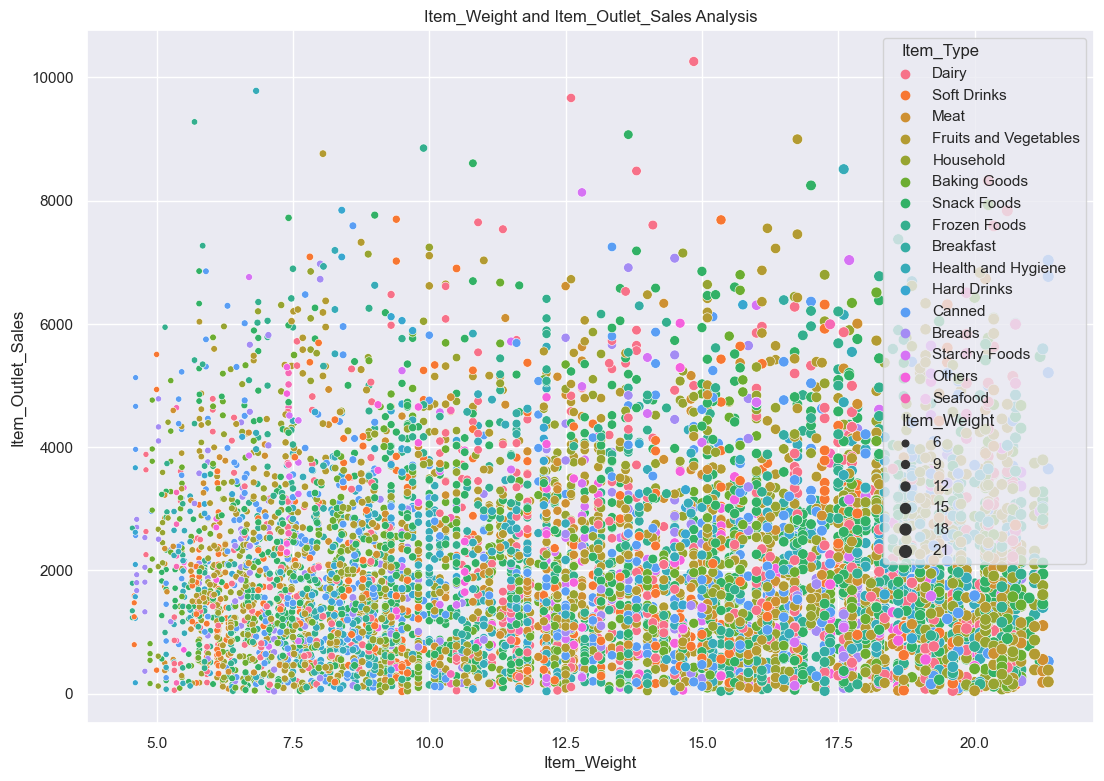

In [22]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=df)

### **Feature Engineering**

**Missing Value Treatment**

- **Item_Weight and Item Outlet** have continuous variales. Hence filling it with mean makes more sense

In [23]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean()) 
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean())

In [24]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

- From the above analysis **Medium** has the highest frequency. So, filling the null values with Medium

In [25]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [26]:
df.isnull().sum() #now we do not have any null values in Outlet_Size

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- From the Box Plot at the beginning it is notable that **Item_Visibility** has outliers. Replace those with mean values

In [27]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [28]:
# print total number of 0s
print('Total of 0s before replace: ', sum(df['Item_Visibility'] == 0))

# replace 0s with the mean
df.loc[:,'Item_Visibility'].replace(to_replace=0,
                                            value=df['Item_Visibility'].mean(),
                                            inplace=True)

# print total number of 0s after the replace
print('Total of 0s after replace: ', sum(df['Item_Visibility'] == 0))

Total of 0s before replace:  879
Total of 0s after replace:  0


In [29]:
## Item_Fat_Content
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [30]:
# replace the repetitive values
df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [31]:
## Creating new feature "Outlet_Years"

In [32]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [33]:
df['Outlet_Years'] = 2009-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [34]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.065953   
4           NCD19         8.93          Low Fat         0.065953   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Years  
0  Supermarket Type1          3735.1380            10  
1  Supermarket Type2           443.4228             0  
2  Supermarket Type1          2097.2700            10  
3      Grocery Store           732.3800            11  
4  Supermarket Type1           994.7052            22

In [35]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Years                 0
dtype: int64

### Data Pre-processing

In [36]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet']
for i in varib:
    df[i] = label.fit_transform(df[i])


In [37]:
#Dummy Variables:

df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
df.head()
    

Item_Identifier  Item_Weight  Item_Visibility              Item_Type  \
0           FDA15         9.30         0.016047                  Dairy   
1           DRC01         5.92         0.019278            Soft Drinks   
2           FDN15        17.50         0.016760                   Meat   
3           FDX07        19.20         0.065953  Fruits and Vegetables   
4           NCD19         8.93         0.065953              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  \
0  249.8092            OUT049                       1999          3735.1380   
1   48.2692            OUT018                       2009           443.4228   
2  141.6180            OUT049                       1999          2097.2700   
3  182.0950            OUT010                       1998           732.3800   
4   53.8614            OUT013                       1987           994.7052   

   Outlet_Years  Outlet  ...  Outlet_Size_0  Outlet_Size_1  Outlet_Size_2  \
0            10       9  ...              0              1              0   
1             0       3  ...              0              1              0   
2            10       9  ...              0              1              0   
3            11       0  ...              0              1              0   
4            22       1  ...              1              0              0   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       0                       1   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       1   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  
0              0              1              0              0  
1              0              0              1              0  
2              0              1              0              0  
3              1              0              0              0  
4              0              1              0              0  

[5 rows x 22 columns]

In [38]:
# Input data feature split

In [39]:
x=df.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']   

In [40]:
df = df.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Outlet_Identifier','Item_Outlet_Sales'],axis=1)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)     

### Feature Scaling

In [42]:
robust_scaler = RobustScaler()
robust_scaled_data=robust_scaler.fit_transform(df)

In [43]:
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(df)

# dataframe with both standard and robust scaled values
scaled_values = pd.DataFrame({
    'Standard': standard_scaled_data.reshape(-1),
    'Robust': robust_scaled_data.reshape(-1)
})

## Modeling
- Linear Regression
- Regularized Linear Regression
- Random Forest
- XGBoost and Gradient Boosting

### Linear Regression

In [44]:
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [45]:
print("MEAN SQUARED ERROR:",  mean_squared_error(y_test,y_pred))
print("MEAN ABSOLUTE ERROR:",  mean_absolute_error(y_test,y_pred))
print("MEAN ABSOLUTE PERCENTAGE ERROR:",  mean_absolute_percentage_error(y_test,y_pred))
rsme_lr = np.sqrt(np.mean(np.square(((y_test- y_pred) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_lr)
print(f"R2_score is: {model.score(x_test, y_test)*100}%")

MEAN SQUARED ERROR: 1131091.0421538043
MEAN ABSOLUTE ERROR: 807.563849815376
MEAN ABSOLUTE PERCENTAGE ERROR: 0.695390968787489
ROOT MEAN SQUARED ERROR(RMSE) 1.396206307670312
R2_score is: 32.45287364858077%


In [46]:
lr_accuracy = round(model.score(x_train,y_train)*100)
lr_accuracy

34

### Random Forest Regreesor

In [47]:
model_2=RandomForestRegressor(n_estimators =50)
model_2.fit(x_train,y_train)
y_pred2=model_2.predict(x_test)

In [48]:
print("MEAN SQUARED ERROR:",  mean_squared_error(y_test,y_pred2))
print('MEAN ABSOLUTE ERROR:',mean_absolute_error(y_test,y_pred2))
print('MEAN ABSOLUTE PERCENTAGE ERROR:',mean_absolute_percentage_error(y_test,y_pred2))
rsme_rf = np.sqrt(np.mean(np.square(((y_test- y_pred2) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_rf)
print('r2_score:',r2_score(y_test,y_pred2))

MEAN SQUARED ERROR: 1306681.8888413925
MEAN ABSOLUTE ERROR: 859.8159414416407
MEAN ABSOLUTE PERCENTAGE ERROR: 0.8424453497901625
ROOT MEAN SQUARED ERROR(RMSE) 2.3785456381685215
r2_score: 0.21966841432487594


### Lasso Regression

In [49]:
model_3 = Lasso(max_iter=10e5)
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)

In [50]:
print("MEAN SQUARED ERROR:",  mean_squared_error(y_test,y_pred_3))
print("MEAN ABSOLUTE ERROR",mean_absolute_error(y_test, y_pred_3))
print("MEAN ABSOLUTE PERCENTAGE ERROR:",  mean_absolute_percentage_error(y_test,y_pred_3))
rsme_la= np.sqrt(np.mean(np.square(((y_test- y_pred_3) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_la)
print(f"R2_score is: {model_3.score(x_test, y_test)*100}%")

MEAN SQUARED ERROR: 1131273.4518751649
MEAN ABSOLUTE ERROR 807.5789965272633
MEAN ABSOLUTE PERCENTAGE ERROR: 0.6974310021739396
ROOT MEAN SQUARED ERROR(RMSE) 1.400666921535477
R2_score is: 32.44198040299994%


### Ridge Regression

In [51]:
model_4 = Ridge(max_iter=10e5)
model_4.fit(x_train, y_train)
y_pred_4 = model_4.predict(x_test)

In [52]:
print("MEAN SQUARED ERROR:",  mean_squared_error(y_test,y_pred_4))
print("MEAN ABSOLUTE ERROR",mean_absolute_error(y_test, y_pred_4))
print("MEAN ABSOLUTE PERCENTAGE ERROR:",  mean_absolute_percentage_error(y_test,y_pred_4))
score=r2_score(y_test,y_pred_4)
rsme_rd= np.sqrt(np.mean(np.square(((y_test- y_pred_4) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_rd)
print(f"R2_score is: {model_4.score(x_test, y_test)*100}%")

MEAN SQUARED ERROR: 1131181.583628737
MEAN ABSOLUTE ERROR 807.5703769901728
MEAN ABSOLUTE PERCENTAGE ERROR: 0.6956488481419534
ROOT MEAN SQUARED ERROR(RMSE) 1.396784945584266
R2_score is: 32.447466642230815%


### Elastic Net Regression

In [53]:
from sklearn.linear_model import ElasticNet
model_5 = ElasticNet(alpha = 0.1, l1_ratio=0.5)
model_5.fit(x_train, y_train)
y_pred_5= model_5.predict(x_test)

In [54]:
print("MEAN SQUARED ERROR:",  mean_squared_error(y_test,y_pred_5))
print("MEAN ABSOLUTE ERROR",mean_absolute_error(y_test, y_pred_5))
print("MEAN ABSOLUTE PERCENTAGE ERROR:",  mean_absolute_percentage_error(y_test,y_pred_5))
score=r2_score(y_test,y_pred_5)
rsme_el = np.sqrt(np.mean(np.square(((y_test- y_pred_5) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_el)
print(f"R2_score is: {model_5.score(x_test, y_test)*100}%")

MEAN SQUARED ERROR: 1146192.292340611
MEAN ABSOLUTE ERROR 812.5247755102695
MEAN ABSOLUTE PERCENTAGE ERROR: 0.7830322695897205
ROOT MEAN SQUARED ERROR(RMSE) 1.6719981291132635
R2_score is: 31.551048758790934%


### XG boost Regrssor

In [55]:
model_6 = XGBRegressor(n_estimators = 100, learning_rate=0.05)
model_6.fit(x_train, y_train)
y_pred_6 = model_6.predict(x_test)

In [56]:
model_6.score(x_test, y_test)

0.32539858042839265

### HyperTuning using GridSearch Cross validation

In [57]:
from sklearn.model_selection import GridSearchCV
xgb_model=XGBRegressor(random_state=1)

params = {'max_depth': [3, 5, 7, 10],'min_child_weight': [1, 3, 5],'subsample': [0.5, 0.7],'n_estimators' : [100, 200, 500],'colsample_bytree': [0.5, 0.7]}

g_XGB =GridSearchCV(xgb_model,params,scoring = 'neg_mean_absolute_error',cv = 2,n_jobs = -1)
g_XGB.fit(x_train,y_train)

g_XGB.best_params_

{'colsample_bytree': 0.5,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

In [58]:
y_pred=g_XGB.predict(x_test)
y_pred

array([1581.0465 , 1750.1781 , 2885.5383 , ..., 3027.0056 , 2265.407  ,
       1020.20026], dtype=float32)

In [59]:
print("MEAN SQUARED ERROR:",  mean_squared_error(y_test,y_pred))
print('MEAN ABSOLUTE ERROR:',mean_absolute_error(y_test,y_pred))
print('MEAN ABSOLUTE PERCENTAGE ERROR:',mean_absolute_percentage_error(y_test,y_pred))
rsme_xg = np.sqrt(np.mean(np.square(((y_test- y_pred) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_xg)
print('R2_score:',r2_score(y_test,y_pred))

MEAN SQUARED ERROR: 1130577.295303686
MEAN ABSOLUTE ERROR: 812.4582850469998
MEAN ABSOLUTE PERCENTAGE ERROR: 0.7639692631237304
ROOT MEAN SQUARED ERROR(RMSE) 1.693722630414766
R2_score: 0.32483553869804627


### GradientBoost Regressor

In [60]:
model_6 = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.05)
model_6.fit(x_train, y_train)
y_pred_6 = model_6.predict(x_test)

In [61]:
#Gbr_model = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.05)
#params={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
#g_GBR=GridSearchCV(estimator=Gbr_model,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,cv=2)
#g_GBR.fit(x_train,y_train)

#g_GBR.best_params_

In [62]:
#y_pred8=g_GBR.predict(x_test)
#y_pred8

In [64]:
print("MEAN SQUARED ERROR:",  mean_squared_error(y_test,y_pred_6))
print('MEAN ABSOLUTE ERROR:',mean_absolute_error(y_test,y_pred_6))
print('MEAN ABSOLUTE PERCENTAGE ERROR:',mean_absolute_percentage_error(y_test,y_pred_6))
rsme_gb = np.sqrt(np.mean(np.square(((y_test- y_pred_6) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_gb)
print('R2_score:',r2_score(y_test,y_pred_6))

MEAN SQUARED ERROR: 1096128.1620980757
MEAN ABSOLUTE ERROR: 806.0826541230108
MEAN ABSOLUTE PERCENTAGE ERROR: 0.8113326390095676
ROOT MEAN SQUARED ERROR(RMSE) 2.0236097154368418
R2_score: 0.34540806439770444


In [65]:
model = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest','Lasso Regression','Ridge Regression','ElasticNet Regression','XGBoost','GBR'],'RMSE_mean'    : [rsme_lr,rsme_rf,rsme_la,rsme_rd,rsme_el,rsme_xg,rsme_gb]})
     

Plotting based on Model and RSME


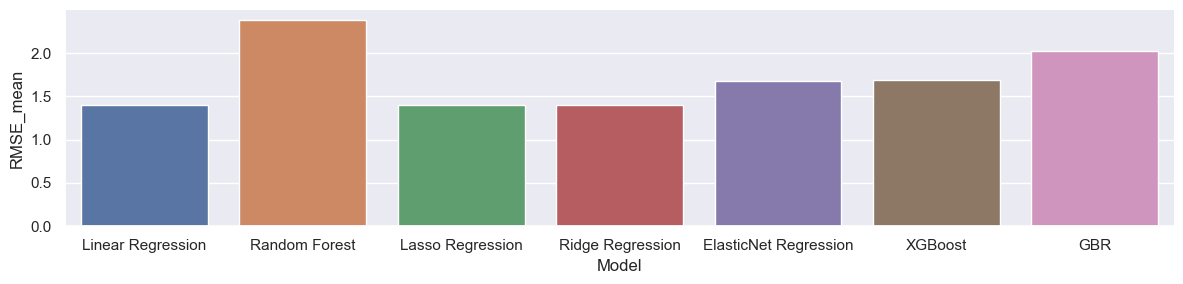

In [66]:
sns.factorplot(x= 'Model', y= 'RMSE_mean', kind='bar',data= model, size=3, aspect=4)
print('Plotting based on Model and RSME')
     

- **Conclusion:**
- Random Forest Regressor appeared to acchive highest rmse value of 2.36
- The advantanges of forecasting Sales is to predict multiple attibutes that affects sales in the industry. Fluctuations in the Sales must be read carefully by forecastig. Forecasting sales helps to analyze it and it retains a particular company from bad bigdrop